<h1 align="center">Assignment 3</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. **Regression Analysis**

#### For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model hyperparameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "**ViolentCrimesPerPop**". **Note:** The two identifier attributes "state" and "community name" should be excluded for the regression task.

#### Your tasks in this problem are the following.

#### a. **[5 pts]** Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (**important note**: for reproducible output across multiple runs, please use **"random_state = 33"**). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [2]:
communities_df = pd.read_csv('communities/communities.csv')
communities_df.head(10)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,6,SouthPasadenacity,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,44,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,6,Selmacity,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,21,Hendersoncity,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,29,Claytoncity,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [3]:
comm_clean_df = communities_df.drop(columns=['state', 'communityname'])
comm_clean_df.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [4]:
# setting to display all the rows, to view all attributes (series)
# pd.set_option('display.max_rows', None)

comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

Series([], dtype: int64)

In [5]:
comm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [6]:
# -- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal) from dataset description
# but it's object type so there is a possible chance of this data having missing values
comm_clean_df['OtherPerCap'].unique()

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?',
       '0.39', '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1',
       '0.46', '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77',
       '0.69', '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59',
       '0.01', '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49',
       '0.56', '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79',
       '0.99', '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65',
       '0.89'], dtype=object)

In [7]:
# imputing those '?' values based on variable means
comm_clean_df = comm_clean_df.replace('?', np.nan)
comm_clean_df['OtherPerCap'] = comm_clean_df['OtherPerCap'].astype('float64')
comm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [8]:
comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

OtherPerCap    1
dtype: int64

In [9]:
comm_clean_df['OtherPerCap'] = comm_clean_df['OtherPerCap'].fillna(comm_clean_df['OtherPerCap'].mean())
comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

Series([], dtype: int64)

In [10]:
# Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set
comm_clean_df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
comm_target_df = comm_clean_df[['ViolentCrimesPerPop']]
comm_target_df.head(5)

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [12]:
comm_clean_df.drop(columns=['ViolentCrimesPerPop'],inplace=True)
comm_clean_df.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [13]:
# Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comm_clean_df, comm_target_df, test_size=0.2, random_state=33)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1595, 97)
X_test shape: (399, 97)
y_train shape: (1595,)
y_test shape: (399,)


_I loaded the csv dataset first then used dropped the unneeded attributes for regression "state" and "community name". Then checked for any missing values using isna() but since there were none, I tried looking at the datatypes of the attributes to determine if any characters like '?', '*', etc. is used to determine the missing values. Since, OtherPerCap was object and all other columns were float, I checked for unquie values in that column, and found out that '?' was representing the empty values in that column. So I replaced '?' with NaN, converted into float64, and used fillna() to replace the '?' with mean of that column data. Then I checked basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set and used scikit-learn's train_test_split function to create a 20%-80% randomized split of the data with random_state=33 for reproducability. Since test data is usually 1D array, using .ravel() function to convert into 1D array._

#### b. **[10 pts]** Perform **standard multiple linear regression** on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the **KFold** module from **sklearn.model_selection**).

In [14]:
# create a function to measure the perfomance of the model
from sklearn.metrics import root_mean_squared_error

def measure_perfomance(X, y, model, metric = root_mean_squared_error):
    y_pred = model.predict(X)
    score = metric(y, y_pred)
    return score

In [17]:
# Perform standard multiple linear regression on data using the scikit-learn Linear Regression module
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)

for i in range(10):
    print(f'Actual Value: {y_train[i]}, Predicted Value: {y_pred_train[i]:.4f}')

Actual Value: 0.08, Predicted Value: -0.0306
Actual Value: 0.4, Predicted Value: 0.6268
Actual Value: 0.02, Predicted Value: -0.0737
Actual Value: 0.18, Predicted Value: 0.1154
Actual Value: 0.07, Predicted Value: 0.0708
Actual Value: 0.33, Predicted Value: 0.4414
Actual Value: 0.56, Predicted Value: 0.7031
Actual Value: 0.15, Predicted Value: 0.1242
Actual Value: 0.22, Predicted Value: 0.2300
Actual Value: 0.76, Predicted Value: 0.4887


In [18]:
# Compute the RMSE values on the full training data (the 80% partition)
train_rmse = measure_perfomance(X_train, y_train, linreg)

print(f'The RMSE value on the full training data is: {train_rmse}')

The RMSE value on the full training data is: 0.1261959313342669


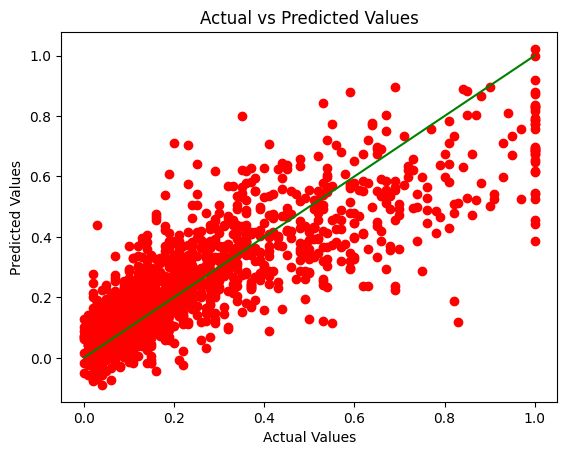

In [19]:
# plot the correlation between the predicted and actual values of the target attribute
plt.scatter(y_train, y_pred_train, c='r')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'g-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

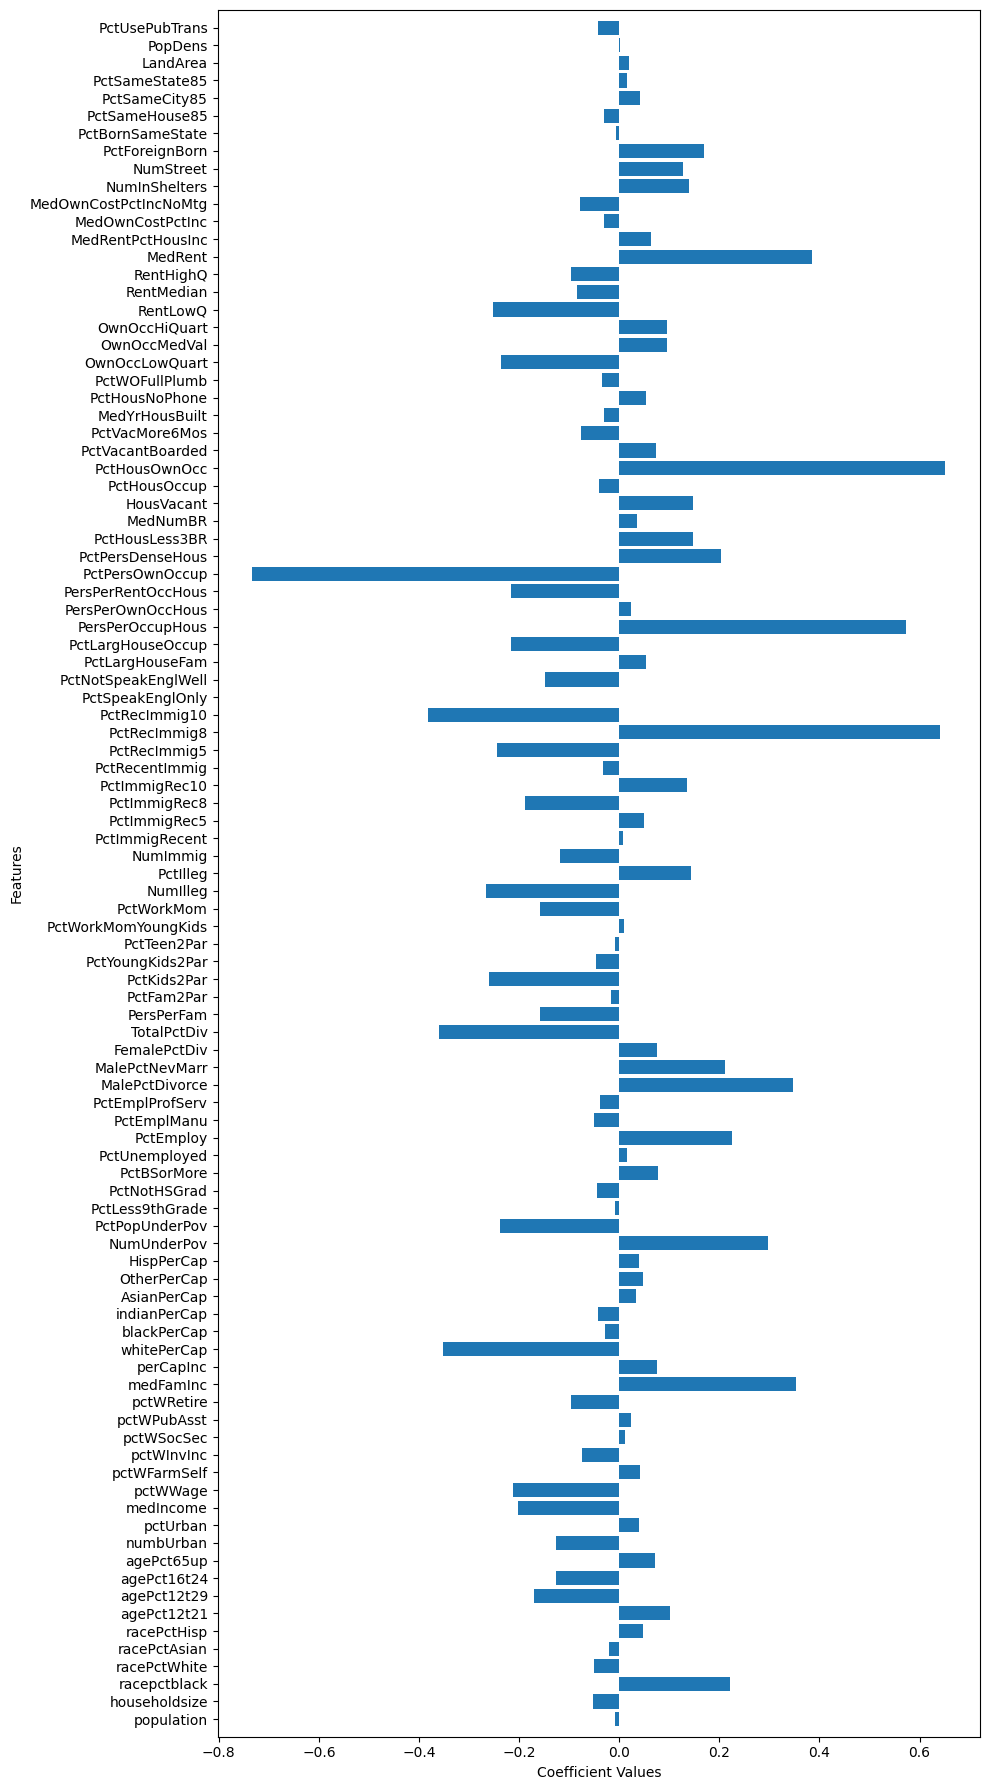

In [20]:
# Display the obtained regression coefficients (weights) and plot them using matplotlib.
categories = comm_clean_df.columns.to_numpy()
weights = (linreg.coef_).flatten()

plt.figure(figsize=(10,18))
plt.barh(categories, weights)
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.ylim(-1, len(categories))
plt.tight_layout()

In [23]:
# perform 10-fold cross-validation on the training partition
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
curr_fold = 1
total_rmse = []
for train_idx, test_idx in kf.split(X_train):
    linreg.fit(X_train.iloc[train_idx], y_train[train_idx])
    p_rmse = measure_perfomance(X_train.iloc[test_idx], y_train[test_idx], linreg)
    
    print(f'Fold {curr_fold}, RMSE: {p_rmse:.4f}')
    total_rmse.append(p_rmse)
    curr_fold += 1

Fold 1, RMSE: 0.1437
Fold 2, RMSE: 0.1385
Fold 3, RMSE: 0.1330
Fold 4, RMSE: 0.1360
Fold 5, RMSE: 0.1351
Fold 6, RMSE: 0.1323
Fold 7, RMSE: 0.1192
Fold 8, RMSE: 0.1216
Fold 9, RMSE: 0.1367
Fold 10, RMSE: 0.1468


In [24]:
print(f'10-fold Cross Validation RMSE: {np.mean(total_rmse):.4f}')
print(f'Training RMSE: {train_rmse:.4f}')

10-fold Cross Validation RMSE: 0.1343
Training RMSE: 0.1262


_First, I created a measure_performance function as suggested in class that takes X, y, model name, and metric which is by default root mean squared error. Then I used the training data to calculate and predict on the training data. I used the measure_performance function to calculate the rsme on training data. Then plotted a correlation between predicted and actual values of the training set. Then displayed the weights (coefficient) using barh from matplotlib. Then used the KFold to perform 10-fold cross validation on the training partition. I am only passing the X_train here because KFold only looks at the length of X, and splitting the rows of X_train, if I had used StratifiedKFold which preserves the class proportion it requires X_test as well for class labels. Finally, compared the cross-validation RMSE to the training RMSE, since the training RMSE is lower than CV RMSE the model may be overfitting slightly._

#### c. **[15 pts] Feature Selection**: use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use **feature_selection.SelectPercentile** to find the most informative variables for a range of percentile values [**Note**: since this is regression not classification, in the **SelectPercentile** function you should use **feature_selection.f_regression** as scoring function rather than **chi2**). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. You will use RMSE as the error metric. For cross-validation, use scikit's **cross_val_score** function. In order to use **cross_val_score** with regression you'll need to pass to it a specific error function. In this case, you will use **scoring='neg_root_mean_squared_error'** as a parameter. You should use absolute values to convert these negated RMSE values to positive RMSE values. Your plot should look similar to this example (which shows MAE values instead of RMSE values for a similar dataset). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute its performance (again using RMSE) on the set-aside 20% test partition.

In [25]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score

percentiles = range(1, 100, 5)

def best_features(train, target, reg_model):
    results = []
    for percentile in percentiles:
        fs = SelectPercentile(f_regression, percentile=percentile)
        X_train_fs = fs.fit_transform(train, target)
        scores = cross_val_score(reg_model, X_train_fs, target, cv=5, scoring='neg_root_mean_squared_error')
        fs_rmse = abs(scores.mean())
        print(f'Percentile: {percentile}, RMSE: {fs_rmse:.4f}')
        results.append(fs_rmse)
    return results

In [26]:
results = best_features(X_train, y_train, linreg)
results = np.array(results, dtype=float)

Percentile: 1, RMSE: 0.1546
Percentile: 6, RMSE: 0.1439
Percentile: 11, RMSE: 0.1422
Percentile: 16, RMSE: 0.1413
Percentile: 21, RMSE: 0.1392
Percentile: 26, RMSE: 0.1372
Percentile: 31, RMSE: 0.1357
Percentile: 36, RMSE: 0.1356
Percentile: 41, RMSE: 0.1355
Percentile: 46, RMSE: 0.1358
Percentile: 51, RMSE: 0.1359
Percentile: 56, RMSE: 0.1357
Percentile: 61, RMSE: 0.1354
Percentile: 66, RMSE: 0.1353
Percentile: 71, RMSE: 0.1355
Percentile: 76, RMSE: 0.1347
Percentile: 81, RMSE: 0.1345
Percentile: 86, RMSE: 0.1345
Percentile: 91, RMSE: 0.1346
Percentile: 96, RMSE: 0.1344


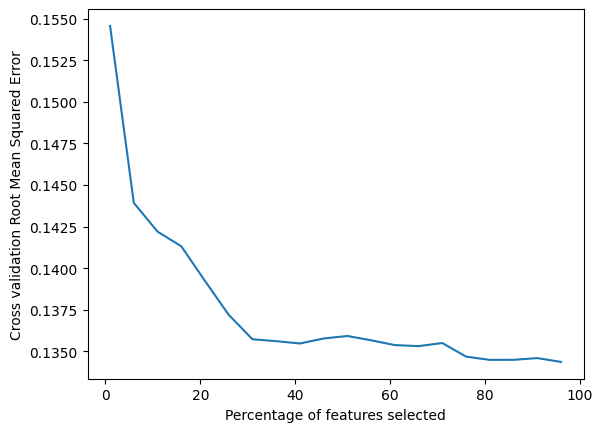

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

In [51]:
plt.plot(list(percentiles), results)
plt.xlabel('Percentage of features selected')
plt.ylabel('Cross validation Root Mean Squared Error')
plt.show()

In [28]:
print(f'Best (lowest) RMSE on cross-validation: {min(results):.4f}')

Best Percentile based on cross-validation: 0.1344


In [38]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print(f'Optimal percentile of features: {percentiles[optimal_percentile_ind]}')
optimal_num_features = int(percentiles[optimal_percentile_ind] * len(X_train.columns)/100)
print(f'Optimal number of features: {optimal_num_features}')

Optimal percentile of features: 96
Optimal number of features: 93


In [46]:
# displaying corresponding best features
fs_best_features = SelectPercentile(f_regression, percentile=percentiles[optimal_percentile_ind])
X_train_fs = fs_best_features.fit_transform(X_train, y_train)
X_test_fs =  fs_best_features.transform(X_test)

best_features = X_train.columns[fs_best_features.get_support()].values
print(f'The corresponding best features are: {best_features}')

The corresponding best features are: ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctHisp'
 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up' 'numbUrban'
 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'TotalPctDiv' 'PersPerFam' 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par'
 'PctTeen2Par' 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig'
 'PctImmigRecent' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10'
 'PctRecentImmig' 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10'
 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell' 'PctLargHouseFam'
 'PctLargHouseOccup' 'PersPerOccupHous' 'PersPerOwnOccHous'
 'PersPerRentOccHous' 'PctPersOwnOc

In [44]:
X_train_fs

array([[0.01, 0.54, 0.02, ..., 0.01, 0.2 , 0.47],
       [0.99, 0.42, 0.59, ..., 0.28, 0.55, 0.62],
       [0.01, 0.53, 0.02, ..., 0.11, 0.03, 0.09],
       ...,
       [0.02, 0.48, 0.23, ..., 0.01, 0.47, 0.98],
       [0.01, 0.56, 0.09, ..., 0.02, 0.19, 0.01],
       [0.96, 0.32, 1.  , ..., 0.18, 0.83, 1.  ]], shape=(1595, 93))

In [47]:
X_test_fs

array([[0.  , 0.46, 0.01, ..., 0.04, 0.06, 0.03],
       [0.01, 0.35, 0.01, ..., 0.03, 0.11, 0.01],
       [0.51, 0.31, 0.6 , ..., 0.12, 0.68, 0.75],
       ...,
       [0.06, 0.36, 0.37, ..., 0.03, 0.42, 1.  ],
       [0.01, 0.48, 0.01, ..., 0.02, 0.18, 0.01],
       [0.07, 0.32, 0.99, ..., 0.02, 0.54, 0.71]], shape=(399, 93))

In [48]:
fs_linreg = LinearRegression()
fs_linreg.fit(X_train_fs, y_train)
measure_perfomance(X_test_fs, y_test, fs_linreg)

0.14383228853975444

_First I created a best_features function that takes as input the training data; target variable; the regression model and uses the percentiles values to calculate the Fscore using SelectPercentile with f_regression to select the best features then I use fit_transform on the train and target to get the new X_train_fs with only best features values and calculate the scores using cross_val_score for 5 folds, using cross_val_score since we just need to check the cross validation score which uses k-fold under the hood. Since I am using neg_root_mean_squared_error, I also took the abs of the mean of the score to get the rsme on the overall 5 fold and stored the results in results dictionary. Then I converted the results into numpy array. I plotted the precentiles vs results graph, printed the lowest RSME from the 5-fold which was 96th percentile of the features with total features equal to 93. Since, 96th percentile actually mean only 4% of the features, however the implementation of scikit-learn actually means that 96% of the features are the best after feature selection. The I used the SelectPercentile to pass the percentile i.e. 96 and transformed both the X_train and X_test to only keep the required features. I then used the get_support() function to get all the columns which are preserved. Finally, I used the selected features to train the multiple linear regression and get the RSME score. One interesting thing I found about the code from Titanic.ipynb which I am also using here in this assignment is that, SelectPercentile is fit on the entire training set before cross_val_score which technically introduces data leakage since the selector sees all the data before cross-validation splits it and it would be  more correct to wrap it in a Pipeline so the feature selector is re-fit inside each fold._

#### d. **[10 pts]** Next, using the original train and test data in part (a), perform **Ridge Regression and Lasso Regression** using the modules from **sklearn.linear_model**. In each case, perform systematic **model selection** to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (again using RMSE as the error metric) on the training and cross-validation splits across the specified values of **alpha**. Finally, using the best **alpha** values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off.

In [76]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(f'{param_name} = {param_value:.4f}')
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = measure_perfomance(X[train], y[train], clf)
            k_test_scores[j] = measure_perfomance(X[test], y[test], clf)
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation RSME")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [77]:
ridge_range = np.linspace(0.001, 10, 20)
ridge_range

array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01])

alpha, = , 0.0010
alpha, = , 0.5273
alpha, = , 1.0535
alpha, = , 1.5798
alpha, = , 2.1061
alpha, = , 2.6323
alpha, = , 3.1586
alpha, = , 3.6848
alpha, = , 4.2111
alpha, = , 4.7374
alpha, = , 5.2636
alpha, = , 5.7899
alpha, = , 6.3162
alpha, = , 6.8424
alpha, = , 7.3687
alpha, = , 7.8949
alpha, = , 8.4212
alpha, = , 8.9475
alpha, = , 9.4737
alpha, = , 10.0000


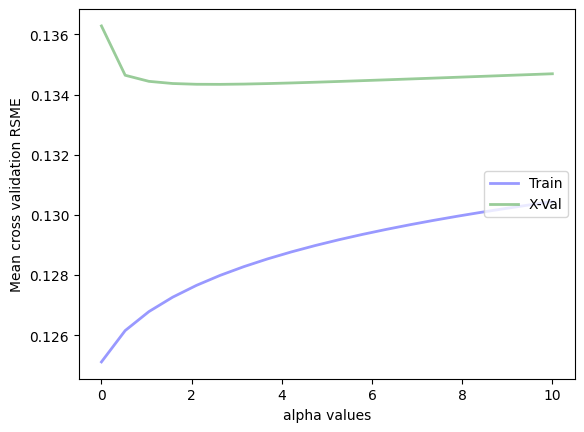

In [78]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge()
ridge_train_scores, ridge_test_scores = calc_params(X_train, y_train, ridge_reg, ridge_range, 'alpha', 5)

In [72]:
# the best alpha value for Ridge Regression
ridge_best_alpha_idx = np.argmin(ridge_test_scores)
ridge_best_alpha = ridge_range[ridge_best_alpha_idx]
print(f'Best alpha for Ridge Regression: {ridge_best_alpha:.4f} with lowest RSME: {ridge_test_scores[ridge_best_alpha_idx]:.4f}')

Best alpha: 2.6323 with lowest RSME: 0.1343


In [67]:
lasso_range = np.linspace(0.0001, 0.01, 20)
lasso_range

array([0.0001    , 0.00062105, 0.00114211, 0.00166316, 0.00218421,
       0.00270526, 0.00322632, 0.00374737, 0.00426842, 0.00478947,
       0.00531053, 0.00583158, 0.00635263, 0.00687368, 0.00739474,
       0.00791579, 0.00843684, 0.00895789, 0.00947895, 0.01      ])

alpha, = , 0.0001
alpha, = , 0.0006
alpha, = , 0.0011
alpha, = , 0.0017
alpha, = , 0.0022
alpha, = , 0.0027
alpha, = , 0.0032
alpha, = , 0.0037
alpha, = , 0.0043
alpha, = , 0.0048
alpha, = , 0.0053
alpha, = , 0.0058
alpha, = , 0.0064
alpha, = , 0.0069
alpha, = , 0.0074
alpha, = , 0.0079
alpha, = , 0.0084
alpha, = , 0.0090
alpha, = , 0.0095
alpha, = , 0.0100


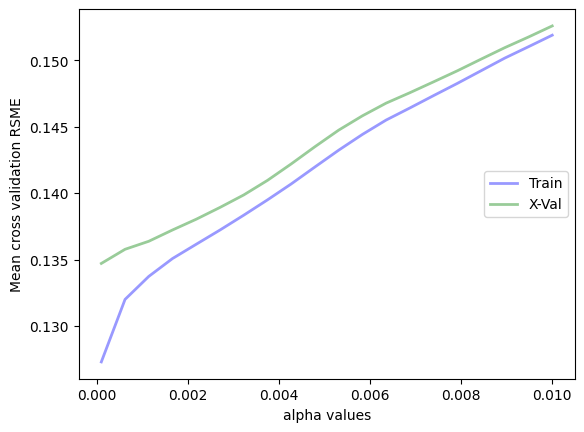

In [80]:
lasso_reg = Lasso()
lasso_train_scores, lasso_test_scores = calc_params(X_train, y_train, lasso_reg, lasso_range, 'alpha', 5)

In [81]:
# the best alpha value for Lasso Regression
lasso_best_alpha_idx = np.argmin(lasso_test_scores)
lasso_best_alpha = lasso_range[lasso_best_alpha_idx]
print(f'Best alpha for Lasso Regression: {lasso_best_alpha:.4f} with lowest RSME: {lasso_test_scores[lasso_best_alpha_idx]:.4f}')

Best alpha for Lasso Regression: 0.0001 with lowest RSME: 0.1347


In [86]:
best_ridge_reg = Ridge(alpha=ridge_best_alpha)
best_ridge_reg.fit(X_train, y_train)
ridge_best_rsme = measure_perfomance(X_test, y_test, best_ridge_reg)
print(f'RSME on test data using alpha: {ridge_best_alpha:.4f} for Ridge Regression is {ridge_best_rsme:.4f}')

RSME on test data using alpha: 2.6323 for Ridge Regression is 0.1440


In [87]:
best_lasso_reg = Lasso(alpha=lasso_best_alpha)
best_lasso_reg.fit(X_train, y_train)
lasso_best_rsme = measure_perfomance(X_test, y_test, best_lasso_reg)
print(f'RSME on test data using alpha: {lasso_best_alpha:.4f} for Ridge Regression is {lasso_best_rsme:.4f}')

RSME on test data using alpha: 0.0001 for Ridge Regression is 0.1436


_I am using calc_params as suggested where I changed the score calculation function to the custom function measure_performance that calculates the RMSE by default. I iterates over the param passed and the value of the param to perform KFold cross validation and stores the mean train scores and test scores (i.e. cross validation score). Then I created ranges for ridge and lasso, since ridge and lasso alpha value works differently, I optimized it accordingly to get the best alpha scores for both. Since we want to find the alpha that minimizes cross-validation RSME and alpha that minimizes the RSME in the training data, which is basically the point where cv RSME is the lowest. And used the best alpha values for Ridge and Lasso to train the model and test the model on test data and calculate the RSME scores. From this, I can see that when alpha value is very small the penalty is weak and the model tends to fit the training data very closely, which can be seen in the graph where the RSME is low on train and high on test with significant gap between them, suggesting the model is overfitting and has low bias but high variance.
As I increase the alpha value, I can see that the RSME gap becomes smaller which suggests that the model is generalizing better meaning bias increases while variance decreases. However, after excessive regularization it clearly shows that RMSE starts increasing which suggests overfitting._ 
_In the result from the graph, the training RSME increased and cross-validation RSME decreased initially with increasing alpha, showing reduced overfitting, but then both errors starts increasing for large alpha, indicating underfitting. The optimal alpha for Ridge regression was around 2.63 and around 0.0001 for Lasso regression where cross validation was minimized which shows the best balance between bias and variance._

#### e. **[10 pts]** Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that **SGDRegessor** requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fitting the model, perform the scaling using **StandardScaler** from **sklearn.preprocessing**. For this problem, perform a grid search (using **GridSearchCV** from **sklearn.grid_search**). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing training and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. [**Note**: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training performance. Provide a brief summary of your findings from the above experiments.